In [17]:
import swan_vis as swan
import sparse
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import numpy as np


## browser models 2 electric boogaloo

In [22]:
sg = swan.read('swan.p')


Read in graph from swan.p


In [118]:
sg.pg.init_plot_settings(sg, tid=tid,
                         indicate_dataset=False,
                         indicate_novel=False,
                         browser=True)

In [117]:
# tid = 'ENSG00000102974[1,1,1]'
tid = 'ENSG00000071564[1,1,1]'
w = 14
h = 0.5
x = 0
y = 1
color = '#8b7af0'

[2.0202, 7.9798]
1.25
3


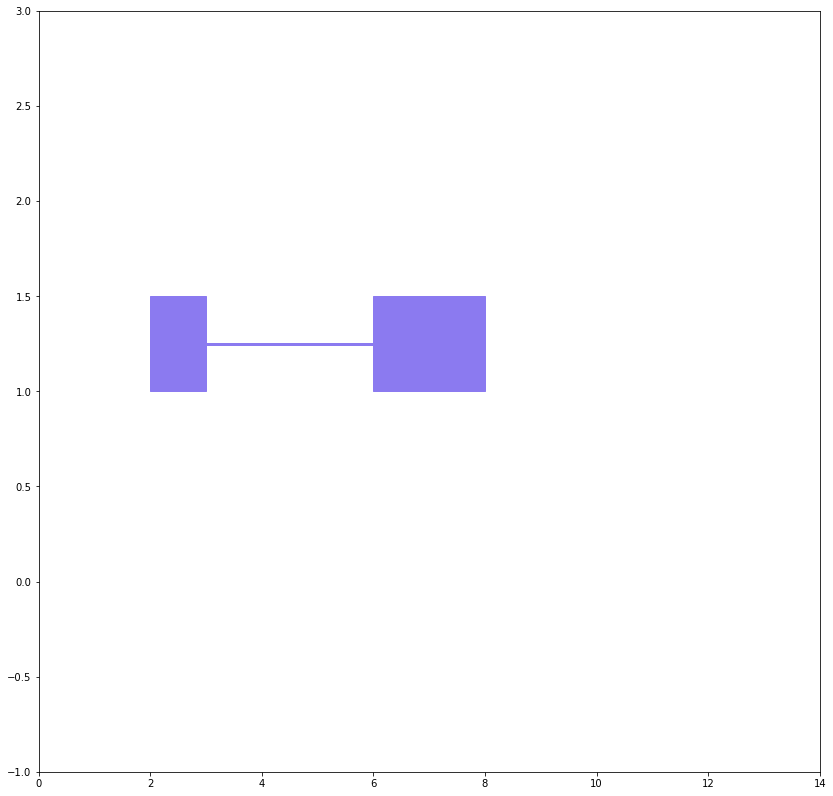

In [112]:


# g_min = sg.pg.g_min
# g_max = sg.pg.g_max
# t_min, t_max = sg.pg.get_transcript_min_max(sg.pg.tid)
# g_len = g_max - g_min
# # print(t_min)
# # print(g_min)

# testing
g_min = 100
g_max = 800
t_min = 200
t_max = 500
g_len = g_max - g_min

# figure setup -- allow for passing an axis too tho!
plt.figure(1, figsize=(14,14), frameon=False)
ax = plt.gca()
plt.xlim(x, x+w)
plt.ylim(y-2, y+2)

# scaling factors
scale = w / g_len

# path / strand info
strand = sg.pg.strand
loc_path = sg.pg.loc_path
edge_path = sg.pg.edge_path

# plot exons
exons = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][::2]
introns = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][1::2]

# testing
exons = [(200,250), (400, 500)]
introns = [(251,399)]

y_coord = y
for v1,v2 in exons:
    
    # # reference exons in the df
    # v1_coord = sg.pg.loc_df.loc[v1, 'coord']
    # v2_coord = sg.pg.loc_df.loc[v2, 'coord']
    
    # testing
    v1_coord = v1
    v2_coord = v2
    
    # x coord
    x_coord = ((v1_coord-g_min)*scale)+x
    
    # width
    width = (v2_coord - v1_coord)*scale
    rect = pch.Rectangle((x_coord, y_coord), width, h, color=color)
    ax.add_patch(rect)
    

# plot intron as a line
dist = 1.01*scale
y_line = y + (h/2)
x_coords = [((t_min-g_min)*scale)+x+dist, ((t_max-g_min)*scale)-dist]
# linewidth = scale*(3/0.02)
linewidth = 3
print(x_coords)
print(y_line)
print(linewidth)
plt.plot(x_coords, [y_line,y_line], color=color, linewidth=linewidth)

# deal with ticks later

plt.savefig('figures/test_browser.pdf')

67562417
307
67571148
116
67610824
789
67611951
170
67616745
133
67620697
120
67621442
149
67626555
160
67628370
182
67629398
135
67636690
161
67637688
1539


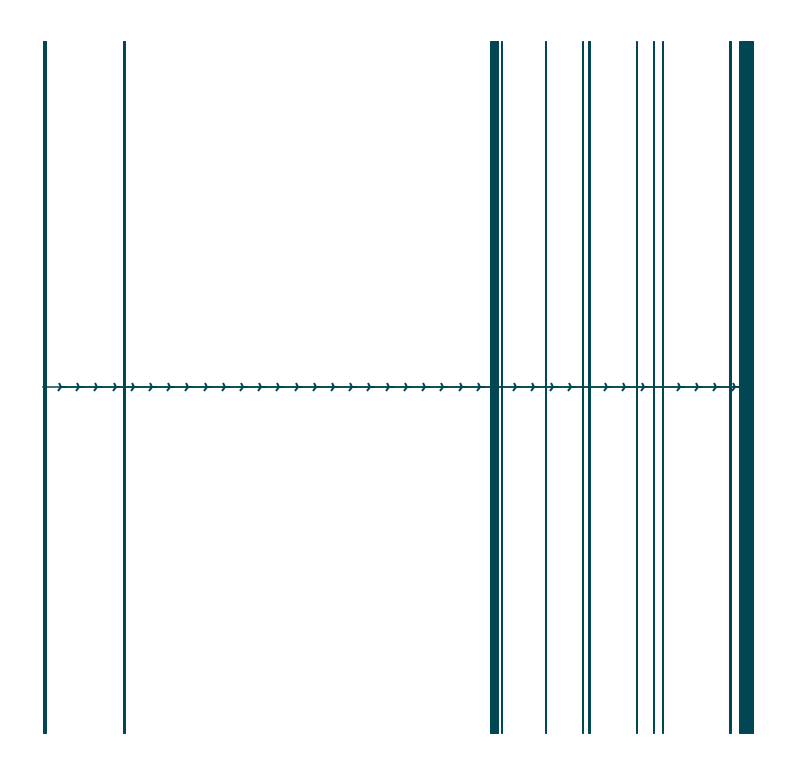

In [30]:


g_min = sg.pg.g_min
g_max = sg.pg.g_max
t_min, t_max = sg.pg.get_transcript_min_max(sg.pg.tid)
g_len = g_max - g_min

x_min = int(g_min-(6/(g_max-g_min)))
x_max = int(g_max+(6/(g_max-g_min)))

strand = sg.pg.strand
loc_path = sg.pg.loc_path
edge_path = sg.pg.edge_path

# plotting init
# plt.figure(1, figsize=(14,2.8), frameon=False)
# plt.xlim(g_min, g_max)
# plt.ylim(-1.05, 1.05)
ax = plt.gca()
color = sg.pg.color_dict['browser']

# plot each exon as a rectangle
y_coord = -0.1
height = 0.2
exons = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][::2]
introns = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][1::2]
for v1,v2 in exons:
    x_coord = sg.pg.loc_df.loc[v1, 'coord']
    width = sg.pg.loc_df.loc[v2, 'coord'] - x_coord
    print(x_coord)
    print(width)
    rect = pch.Rectangle((x_coord,y_coord), width, height, color=color)
    ax.add_patch(rect)

# plot each intron as a line
dist = 0.001*g_len
plt.plot([t_min+dist, t_max-dist], [0,0], color=color)

# reverse plot if we're on the minus strand
if strand == '-':
    plt.gca().invert_xaxis()

# remove axis
plt.axis('off')

def get_tick_coords(loc_df, gene_len, exons, g_min, g_max, strand):

    tick_coords = list(np.linspace(g_min, g_max, 40))

    # remove ticks that are before the start of the first exon
    start = loc_df.loc[exons[0][1], 'coord']
    if strand == '+':
        tick_coords = [t for t in tick_coords if t > start]
    else:
        tick_coords = [t for t in tick_coords if t < start]

    # remove ticks that are after the end of the last exon
    stop = loc_df.loc[exons[-1][1], 'coord']
    if strand == '+':
        tick_coords = [t for t in tick_coords if t < stop]
    else:
        tick_coords = [t for t in tick_coords if t > stop]

    # remove ticks in and around the area of plotted exons
    dist = 0.001*gene_len
    for v1,v2 in exons:
        start = loc_df.loc[v1, 'coord']
        stop = loc_df.loc[v2, 'coord']
        tick_coords = [t for t in tick_coords
                       if t < start-dist or t > stop+dist]

    # if we only have one intron, and nothing made the cut, just stick
    # a tick in the middle of the intron
    if len(exons) == 2 and not tick_coords:
        tick_coords = [(loc_df.loc[exons[0][1],'coord']+loc_df.loc[exons[1][0],'coord'])/2]

    return tick_coords

# get coordinates for evenly-spaced ticks indicating strandedness
# ala genome browser
tick_coords = get_tick_coords(sg.pg.loc_df, g_len, exons,
    g_min, g_max, sg.pg.strand)
plt.plot(tick_coords, [0 for i in range(len(tick_coords))],
    color=color, marker='4', ms=10, mew=2)

## old


In [17]:
sg = swan.read('swan.p')

Read in graph from swan.p


In [ ]:
df = swan.calc_total_counts(sg.tss_adata, obs_col='sample', layer='counts').sparse.to_dense()

In [18]:
df = swan.calc_tpm(sg.tss_adata, obs_col='sample').sparse.to_dense()

In [19]:
df.head()

,ENCODEHG000058784_1,ENCODEHG000058784_2,ENCODEHG000058837_1,ENCODEHG000058837_2,ENCODEHG000058844_1,ENCODEHG000058844_2,ENCODEHG000058846_1,ENCODEHG000058850_1,ENCODEHG000058853_1,ENCODEHG000058854_1,...,ENSG00000285972_2,ENSG00000285976_1,ENSG00000285976_2,ENSG00000285978_1,ENSG00000285980_2,ENSG00000285988_1,ENSG00000285988_2,ENSG00000285988_3,ENSG00000285988_4,ENSG00000285991_1
hl60_m2_24hr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,13.540341,9.701882,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
colon,0.460419,0.460419,35.236786,10.420664,15.581833,2.762515,17.375229,7.827126,11.874339,117.750137,...,0.0,254.145233,223.153107,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
hl60,0.000000,3.055013,6.869515,2.231703,2.593668,0.000000,0.000000,0.498857,1.271501,10.286493,...,0.0,74.978142,64.740364,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
vessels,1.568427,6.538075,114.083252,16.774925,29.967066,1.253958,19.270973,8.823140,12.115827,236.000916,...,0.0,42.929932,59.074059,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
brain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,14.066960,16.906832,0.070702,0.080707,0.0,0.0,0.0,0.0,0.080707


In [20]:
df = swan.calc_tpm(sg.tes_adata, obs_col='sample').sparse.to_dense()

In [21]:
df.head()

,ENCODEHG000058784_1,ENCODEHG000058784_2,ENCODEHG000058837_1,ENCODEHG000058844_1,ENCODEHG000058844_2,ENCODEHG000058844_3,ENCODEHG000058844_4,ENCODEHG000058846_1,ENCODEHG000058850_1,ENCODEHG000058853_1,...,ENSG00000285976_4,ENSG00000285978_1,ENSG00000285980_2,ENSG00000285988_1,ENSG00000285988_2,ENSG00000285991_4,ENSG00000285991_5,ENSG00000285991_6,ENSG00000285991_7,ENSG00000285991_8
hl60_m2_24hr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
colon,0.460419,0.460419,45.657448,2.762515,0.000000,7.827126,7.754707,17.375229,7.827126,1.745118,...,0.896699,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
hl60,3.055013,0.000000,9.101218,0.000000,0.000000,0.673262,1.920406,0.000000,0.498857,1.271501,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
vessels,6.538075,1.568427,130.858185,1.253958,4.025308,18.067204,7.874555,19.270973,8.823140,12.115827,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
brain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.089794,0.070702,0.080707,0.0,0.0,0.080707,0.0,0.0,0.0,0.0
